<a href="https://colab.research.google.com/github/trungtaos/NLP-CS221/blob/main/TopicClassification___remake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Project -* **Topic Classification**
*Subject -* Natural Language Processing 

## Connect Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Count words

In [ ]:
import string
import re
import joblib


In [ ]:
str_ = "Jiri missed a routine backhand in the ninth game and faced a break point. He saved it with a service winner and missed a game point that would cost him dearly. The Czech netted a forehand to face the second break point, and the American converted it after a beautiful rally that pushed him 5-4 in front. Fritz served for the victory in game ten and sealed the deal with an ace to earn the first victory of the new season."

In [ ]:
def process_text(text):
    text = text.lower()
    text = re.sub(
        f"[{re.escape(string.punctuation)}]", " ", text
    )
    text = " ".join(text.split())
    return text

In [ ]:
str1 = process_text(str_)
#str1

In [ ]:
str1 = str1.split()
#str1

In [ ]:
c=0
for i in str1:
  c+=1;
c

82

## Import data

In [ ]:
import pandas as pd
import numpy as np
#%matplotlib ipympl

import matplotlib.pyplot as plt

In [ ]:
df_train = pd.read_csv("/content/df_train.csv")
df_train = df_train[["Doc", "Categories"]]
df_train = df_train.dropna()
#df_train

df_test = pd.read_csv("/content/df_test.csv")
df_test = df_test[["Doc", "Categories"]]
df_test = df_test.dropna()


In [ ]:
X_train = df_train["Doc"]
X_test = df_test["Doc"]
y_train = df_train["Categories"]
y_test = df_test["Categories"]

In [ ]:
#X_train

In [ ]:
df_train['Categories'].value_counts()

Football      25
Tennis        25
Golf          25
Basketball    25
Name: Categories, dtype: int64

## Clean data

In [ ]:
def process_text(text):
    text = str(text).lower()
    text = re.sub(
        f"[{re.escape(string.punctuation)}]", " ", text
    )
    text = " ".join(text.split())
    return text

df_train["Doc"] = df_train.Doc.map(process_text)
df_test["Doc"] = df_test.Doc.map(process_text)

## Visualize Data

In [ ]:
"""
targets_test, frequency_test = np.unique(df_train.Categories, return_counts=True)
targets_test_str = ['Basketball', 'Football', 'Golf', 'Tennis']
print(list(zip(targets_test_str, frequency_test)))
"""

targets_test, frequency_test = np.unique(df_test.Categories, return_counts=True)
targets_test_str = ['Basketball', 'Football', 'Golf', 'Tennis']
print(list(zip(targets_test_str, frequency_test)))



[('Basketball', 5), ('Football', 5), ('Golf', 5), ('Tennis', 5)]


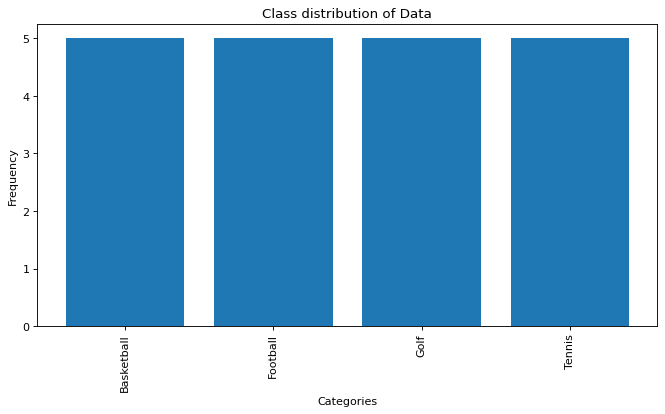

In [ ]:
fig=plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(targets_test_str,frequency_test)
plt.xticks(rotation=90)
plt.title('Class distribution of Data')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.show()

## SVM Train, Test

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn import metrics
import seaborn as sns

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

### stop_words = 'english'

In [ ]:
text_clf = Pipeline([('vect', CountVectorizer(stop_words='english')),
                     ('tfidf', TfidfTransformer()),
                     ('clf', LinearSVC()),  
                     ])
text_clf.fit(X_train, y_train)
predicted = text_clf.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

  Basketball       1.00      0.80      0.89         5
    Football       0.83      1.00      0.91         5
        Golf       1.00      1.00      1.00         5
      Tennis       1.00      1.00      1.00         5

    accuracy                           0.95        20
   macro avg       0.96      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20



In [ ]:
print('Predicted: ', predicted)
print('Actual: ', y_test)

Predicted:  ['Football' 'Football' 'Football' 'Football' 'Football' 'Tennis' 'Tennis'
 'Tennis' 'Tennis' 'Tennis' 'Golf' 'Golf' 'Golf' 'Golf' 'Golf' 'Football'
 'Basketball' 'Basketball' 'Basketball' 'Basketball']
Actual:  0       Football
1       Football
2       Football
3       Football
4       Football
5         Tennis
6         Tennis
7         Tennis
8         Tennis
9         Tennis
10          Golf
11          Golf
12          Golf
13          Golf
14          Golf
15    Basketball
16    Basketball
17    Basketball
18    Basketball
19    Basketball
Name: Categories, dtype: object


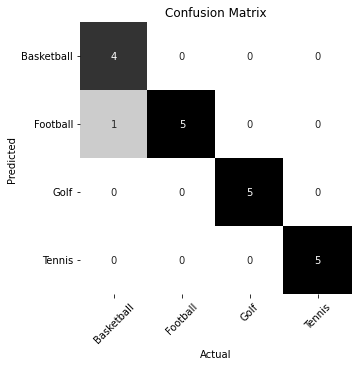

In [ ]:
names = ['Basketball', 'Football', 'Golf', 'Tennis']
cnf_mat = confusion_matrix(y_test, predicted)

fig, ax = plt.subplots(figsize=(10,5))
fig = sns.heatmap(cnf_mat.T, square=True, annot=True, fmt='d', cmap='binary', cbar=False)

plt.xlabel('Actual')
ax.set_xticklabels(names, rotation=45)

plt.ylabel('Predicted')
ax.set_yticklabels(names, rotation=0)

plt.title('Confusion Matrix')

plt.show()

### Non stop_words

In [ ]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', LinearSVC()),  
                     ])
text_clf.fit(X_train, y_train)
predicted = text_clf.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

  Basketball       1.00      0.80      0.89         5
    Football       0.71      1.00      0.83         5
        Golf       1.00      1.00      1.00         5
      Tennis       1.00      0.80      0.89         5

    accuracy                           0.90        20
   macro avg       0.93      0.90      0.90        20
weighted avg       0.93      0.90      0.90        20



In [ ]:
print('Predicted: ', predicted)
print('Actual: ', y_test)

Predicted:  ['Football' 'Football' 'Football' 'Football' 'Football' 'Tennis' 'Tennis'
 'Tennis' 'Tennis' 'Football' 'Golf' 'Golf' 'Golf' 'Golf' 'Golf'
 'Basketball' 'Basketball' 'Football' 'Basketball' 'Basketball']
Actual:  0       Football
1       Football
2       Football
3       Football
4       Football
5         Tennis
6         Tennis
7         Tennis
8         Tennis
9         Tennis
10          Golf
11          Golf
12          Golf
13          Golf
14          Golf
15    Basketball
16    Basketball
17    Basketball
18    Basketball
19    Basketball
Name: Categories, dtype: object


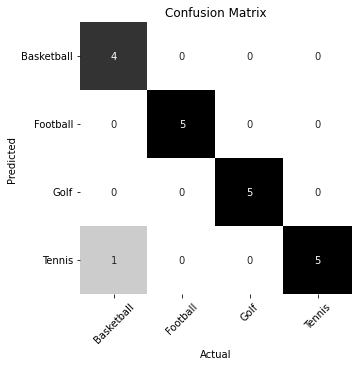

In [ ]:
names = ['Basketball', 'Football', 'Golf', 'Tennis']
cnf_mat = confusion_matrix(y_test, predicted)

fig, ax = plt.subplots(figsize=(10,5))
fig = sns.heatmap(cnf_mat.T, square=True, annot=True, fmt='d', cmap='binary', cbar=False)

plt.xlabel('Actual')
ax.set_xticklabels(names, rotation=45)

plt.ylabel('Predicted')
ax.set_yticklabels(names, rotation=0)

plt.title('Confusion Matrix')

plt.show()

In [ ]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('clf', LinearSVC()),  
                     ])
text_clf.fit(X_train, y_train)
predicted = text_clf.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

  Basketball       0.75      0.60      0.67         5
    Football       0.56      1.00      0.71         5
        Golf       1.00      0.40      0.57         5
      Tennis       0.80      0.80      0.80         5

    accuracy                           0.70        20
   macro avg       0.78      0.70      0.69        20
weighted avg       0.78      0.70      0.69        20



/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


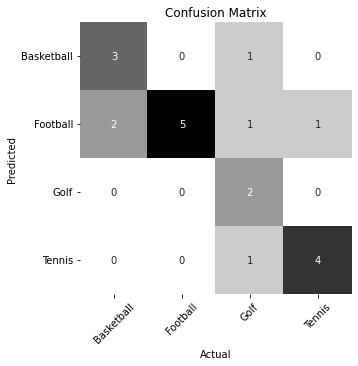

In [ ]:
names = ['Basketball', 'Football', 'Golf', 'Tennis']
cnf_mat = confusion_matrix(y_test, predicted)

fig, ax = plt.subplots(figsize=(10,5))
fig = sns.heatmap(cnf_mat.T, square=True, annot=True, fmt='d', cmap='binary', cbar=False)

plt.xlabel('Actual')
ax.set_xticklabels(names, rotation=45)

plt.ylabel('Predicted')
ax.set_yticklabels(names, rotation=0)

plt.title('Confusion Matrix')

plt.show()

In [ ]:
text_clf = Pipeline([('vect', CountVectorizer(stop_words='english')),
                     ('clf', LinearSVC()),  
                     ])
text_clf.fit(X_train, y_train)
predicted = text_clf.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

  Basketball       1.00      0.60      0.75         5
    Football       0.83      1.00      0.91         5
        Golf       1.00      1.00      1.00         5
      Tennis       0.83      1.00      0.91         5

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.89        20
weighted avg       0.92      0.90      0.89        20



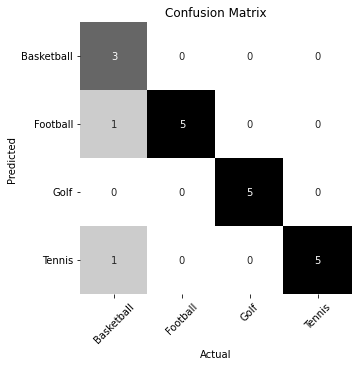

In [ ]:
names = ['Basketball', 'Football', 'Golf', 'Tennis']
cnf_mat = confusion_matrix(y_test, predicted)

fig, ax = plt.subplots(figsize=(10,5))
fig = sns.heatmap(cnf_mat.T, square=True, annot=True, fmt='d', cmap='binary', cbar=False)

plt.xlabel('Actual')
ax.set_xticklabels(names, rotation=45)

plt.ylabel('Predicted')
ax.set_yticklabels(names, rotation=0)

plt.title('Confusion Matrix')

plt.show()

## Classification with NLP (Porter_Stem, Lemma)

In [ ]:
# tách từ + stop_words + chuyển về từ gốc (lemma...)  + 

### Stemming & Lemmatizer

In [ ]:
# Chuyen tu goc Lemmatizer
# import these modules
import nltk
nltk.download('punkt')
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
#tokenizer= word_tokenize() #if you want to split text into word tokens
lemmatizer = WordNetLemmatizer()

In [ ]:
def tokenizer(text):
  tokens = word_tokenize(text)
  tokens = [token.strip() for token in tokens]
  return tokens

In [ ]:
tokens = df_train['Doc'].apply(tokenizer)

In [ ]:
#tokens

In [ ]:
df_train = pd.read_csv("/content/df_train.csv")
df_train = df_train[["Doc", "Categories"]]
df_train = df_train.dropna()
#df_train

df_test = pd.read_csv("/content/df_test.csv")
df_test = df_test[["Doc", "Categories"]]
df_test = df_test.dropna()

In [ ]:
def porter_stemmer(text):
  ps = nltk.porter.PorterStemmer()
  text= ' '.join([ps.stem(word) for word in text.split()])
  return text

  

In [ ]:
def lemmatization(text):
  """
  tokens = word_tokenize(text)
  tokens = [token.strip() for token in tokens]
  lemmatized_string = ' '.join([lemmatizer.lemmatize(token) for token in tokens])
  """
  lemmatized_string = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
  return lemmatized_string

In [ ]:
# Apply 
df_train['Stem'] = df_train['Doc'].apply(porter_stemmer)
df_test['Stem'] = df_test['Doc'].apply(porter_stemmer)
df_train['Lemma'] = df_train['Doc'].apply(lemmatization)
df_test['Lemma'] = df_test['Doc'].apply(lemmatization)

In [ ]:
df_train

,Doc,Categories,Stem,Lemma
0,Palace leave the pitch to moans and groans fro...,Football,palac leav the pitch to moan and groan from th...,Palace leave the pitch to moan and groan from ...
1,Mitchell takes a bad touch and tries to make u...,Football,mitchel take a bad touch and tri to make up fo...,Mitchell take a bad touch and try to make up f...
2,It was a very un-Kane performance on his retur...,Football,it wa a veri un-kan perform on hi return to cl...,It wa a very un-Kane performance on his return...
3,"After every game we do sessions, even during t...",Football,"after everi game we do sessions, even dure the...","After every game we do sessions, even during t..."
4,It had been 45 days since both sides were in P...,Football,it had been 45 day sinc both side were in prem...,It had been 45 day since both side were in Pre...
...,...,...,...,...
95,Do not be fooled by their positioning in our s...,Basketball,do not be fool by their posit in our standings...,Do not be fooled by their positioning in our s...
96,Jamal Murray scored 26 points and Kentavious C...,Basketball,jamal murray score 26 point and kentavi caldwe...,Jamal Murray scored 26 point and Kentavious Ca...
97,You will be hard-pressed to find someone who w...,Basketball,you will be hard-press to find someon who work...,You will be hard-pressed to find someone who w...
98,The Cleveland Cavaliers were on a five-game wi...,Basketball,the cleveland cavali were on a five-gam win st...,The Cleveland Cavaliers were on a five-game wi...


### Porter_Stemming

In [ ]:
X_train_s = df_train['Stem']
y_train_s = df_train['Categories']
X_test_s = df_test['Stem']
y_test_s = df_test['Categories']

In [ ]:
text_clf = Pipeline([('vect', CountVectorizer(stop_words='english')),
                     ('tfidf', TfidfTransformer()),
                     ('clf', LinearSVC()),  
                     ])
text_clf.fit(X_train_s, y_train_s)
predicted_s = text_clf.predict(X_test_s)
print(metrics.classification_report(y_test_s, predicted_s))

              precision    recall  f1-score   support

  Basketball       1.00      0.80      0.89         5
    Football       0.83      1.00      0.91         5
        Golf       0.83      1.00      0.91         5
      Tennis       1.00      0.80      0.89         5

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20



### Lemma

In [ ]:
X_train_l = df_train['Lemma']
y_train_l = df_train['Categories']
X_test_l = df_test['Lemma']
y_test_l = df_test['Categories']

In [ ]:
#predicted

In [ ]:
text_clf = Pipeline([('vect', CountVectorizer(stop_words='english')),
                     ('tfidf', TfidfTransformer()),
                     ('clf', LinearSVC()),  
                     ])
text_clf.fit(X_train_l, y_train_l)
predicted_l = text_clf.predict(X_test_l)
print(metrics.classification_report(y_test_l, predicted_l))

              precision    recall  f1-score   support

  Basketball       1.00      0.80      0.89         5
    Football       0.71      1.00      0.83         5
        Golf       1.00      0.80      0.89         5
      Tennis       1.00      1.00      1.00         5

    accuracy                           0.90        20
   macro avg       0.93      0.90      0.90        20
weighted avg       0.93      0.90      0.90        20



## Desribe NLP

### Libs

In [ ]:
# Chuyen tu goc Lemmatizer
# import these modules
import nltk
nltk.download('punkt')
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
df_train = pd.read_csv("/content/df_train.csv")
df_train = df_train[["Doc", "Categories"]]
df_train = df_train.dropna()
#df_train

df_test = pd.read_csv("/content/df_test.csv")
df_test = df_test[["Doc", "Categories"]]
df_test = df_test.dropna()

In [ ]:
train = df_train[['Doc', 'Categories']]
test = df_test[['Doc', 'Categories']]

In [ ]:
ps = nltk.porter.PorterStemmer()
def trans_stem(text):
  text= ' '.join([ps.stem(word) for word in text.split()])
  return text

#### WordNetLemmatizer

In [ ]:
lemmatizer = WordNetLemmatizer()
def lemmatization(text):
  lemmatized_string = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
  return lemmatized_string

In [ ]:
token = train['Doc'][0].split()

In [ ]:
#token

In [ ]:
lemma = [lemmatizer.lemmatize(word) for word in token]

### No libs

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df_train = pd.read_csv("/content/df_train.csv")
df_train = df_train[["Doc", "Categories"]]
df_train = df_train.dropna()
#df_train

df_test = pd.read_csv("/content/df_test.csv")
df_test = df_test[["Doc", "Categories"]]
df_test = df_test.dropna()

In [ ]:
!pip install openfst-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  ERROR: Failed building wheel for openfst-python
  Running setup.py clean for openfst-python
Failed to build openfst-python
    Running setup.py install for openfst-python ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-ofrql1og/openfst-python_b4ccfb3c3e294270aae890c7313cfe1f/setup.py'"'"'; __file__='"'"'/tmp/pip-install-ofrql1og/openfst-python_b4ccfb3c3e294270aae890c7313cfe1f/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-vi5eic9z/install-record.txt --single-version-externally-managed --compile --install-headers /usr/local/

In [ ]:
str_ = df_test['Doc'][16]

In [ ]:
wnl = WordNetLemmatizer()
list1 = word_tokenize(str_)
for words in list1:
    print(words + " ---> " + wnl.lemmatize(words))

coming ---> coming
off ---> off
their ---> their
nba ---> nba
finals ---> final
run ---> run
in ---> in
2021 ---> 2021
the ---> the
suns ---> sun
were ---> were
expected ---> expected
to ---> to
potentially ---> potentially
get ---> get
back ---> back
there ---> there
again ---> again
in ---> in
2022 ---> 2022
but ---> but
ultimately ---> ultimately
flamed ---> flamed
out ---> out
against ---> against
luka ---> luka
doncic ---> doncic
and ---> and
the ---> the
dallas ---> dallas
mavericks ---> maverick
in ---> in
the ---> the
second ---> second
round ---> round
it ---> it
was ---> wa
a ---> a
painful ---> painful
loss ---> loss
for ---> for
not ---> not
only ---> only
us ---> u
suns ---> sun
fans ---> fan
but ---> but
all ---> all
nba ---> nba
fans ---> fan
as ---> a
a ---> a
suns ---> sun
vs ---> v
warriors ---> warrior
series ---> series
in ---> in
the ---> the
western ---> western
conference ---> conference
finals ---> final
would ---> would
have ---> have
been ---> been
immense ---

In [ ]:
ps = nltk.porter.PorterStemmer()
list1 = str_.split()
for words in list1:
    print(words + " ---> " + ps.stem(words))